In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [2]:
class_1=500#类别1有500个样本
class_2=50#类别2有50个样本
centers=[[0.0,0.0],[2.0,2.0]]#设定两个类别的中心
clusters_std=[1.5,0.5]#设定两个类别的方差，通常来说样本量比较大的类别会更加松散
X,Y=make_blobs(n_samples=[class_1,class_2]
               ,centers=centers
               ,cluster_std=clusters_std
               ,random_state=0
               ,shuffle=False)

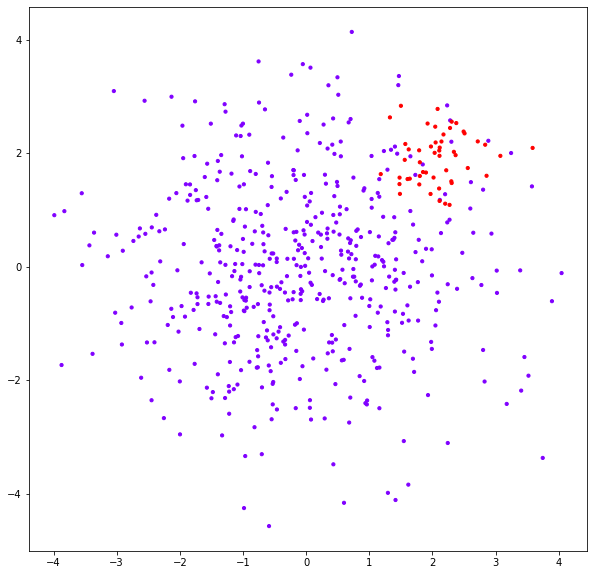

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=Y,cmap="rainbow",s=10)
plt.show()

In [4]:
#不设定class_weight的情况下
clf=SVC(kernel="linear",C=1.0)
clf.fit(X,Y)
#设定class_weight的情况下
wclf=SVC(kernel="linear",C=1.0,class_weight={1:10})
wclf.fit(X,Y)
#给两个模型分别打个分数看看，这个分数是accuracy准确度
balanced_clf=SVC(kernel="linear",C=1.0,class_weight="balanced").fit(X,Y)

In [5]:
clf.score(X,Y)

0.9418181818181818

In [6]:
wclf.score(X,Y)

0.9127272727272727

E:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'linestyle'
  if sys.path[0] == '':
E:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'linestyle'
  
E:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  app.launch_new_instance()


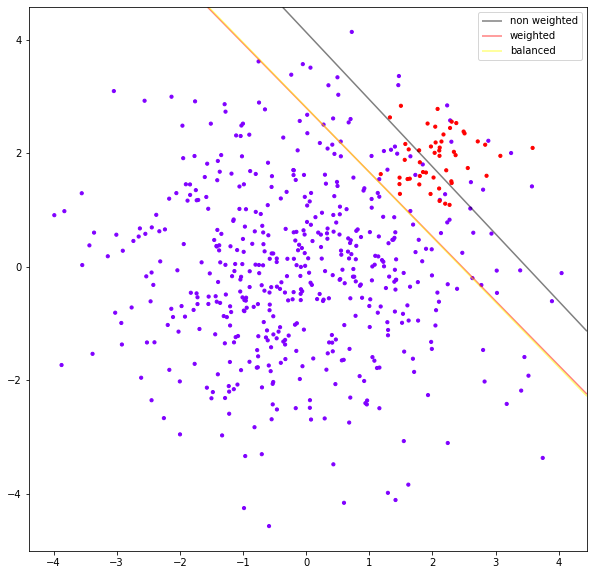

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=Y,cmap="rainbow",s=10)
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
#第二步：找出我们的样本点到决策边界的距离
z_clf=clf.decision_function(xy).reshape(XX.shape)
a=ax.contour(XX,YY,z_clf,colors="black",levels=[0],alpha=0.5,linestyle=["-"])
z_wclf=wclf.decision_function(xy).reshape(XX.shape)
b=ax.contour(XX,YY,z_wclf,colors="red",levels=[0],alpha=0.5,linestyle=["-"])
z_balanced_clf=balanced_clf.decision_function(xy).reshape(XX.shape)
c=ax.contour(XX,YY,z_balanced_clf,colors="yellow",levels=[0],alpha=0.5,linestyle=["-"])
plt.legend([a.collections[0]
            ,b.collections[0]
            ,c.collections[0]]
           ,["non weighted","weighted","balanced"]
           ,loc="upper right")
plt.show()

In [8]:
#调用这个等高线对象中画的所有线，返回一个惰性对象
a.collections
# plt.legend([对象列表],[图例列表]，loc)
#只要对象列表和图例列表相对应，就可以显示出图例

<a list of 1 mcoll.LineCollection objects>

In [9]:
n_clf=SVC(kernel="linear",C=1.0,class_weight="balanced").fit(X,Y)
n_clf.score(X,Y)

0.9109090909090909

In [10]:
"""
根据混淆矩阵求精确度（precision）:
1为少数类，0为多数类，表示为：决策边界上方红色的数目/决策边界上红色+决策边界上方紫色的
"""
#没有使用class_weight
(Y[clf.predict(X)==Y]==1).sum()/(clf.predict(X)==1).sum()
#使用class_weight={1:10}
(Y[wclf.predict(X)==Y]==1).sum()/(wclf.predict(X)==1).sum()
#使用了class_weight={"balanced"}
(Y[balanced_clf.predict(X)==Y]==1).sum()/(balanced_clf.predict(X)==1).sum()

0.5050505050505051

In [11]:
#召回率：决策边界上方的红色数目/全部样本中红色的数目         
#没有使用class_weight
(Y[clf.predict(X)==Y]==1).sum()/(Y==1).sum()
#使用了class_weight={1:10}
(Y[wclf.predict(X)==Y]==1).sum()/(Y==1).sum()
#使用class_weight={"balanced"}
(Y[balanced_clf.predict(X)==Y]==1).sum()/(Y==1).sum()

1.0

In [12]:
#特异度：所有真实为0的样本中，被正确预测为0的样本的比例即（00/01+00）,衡量了将多数类判断为正确的能力，
#没有使用class_weight
(Y[clf.predict(X)==Y]==0).sum()/(Y==0).sum()
#使用了class_weight={1:10}
(Y[wclf.predict(X)==Y]==0).sum()/(Y==0).sum()
#使用class_weight={"balanced"}
(Y[balanced_clf.predict(X)==Y]==0).sum()/(Y==0).sum()

0.902

In [19]:
#假正率：将多数类判断错误的比例：公式：（01/00+01）
1-(Y[clf.predict(X)==Y]==0).sum()/(Y==0).sum()

0.02400000000000002